Tutorial 1: Lens and Source
===========================

As discussed in chapter 2, an effective strategy for modeling strong lenses is to break the model-fitting procedure
down into a series of phases, linking the results of the phases to guide the non-linear search as to where to
sample parameter space. In this chapter, we'll cover _Pipeline_'s, which provide a powerful means by which to
link together many phases.

In chapter 2, we fitted strong lens imaging which included the lens galaxy's light. We're going to fit this dataset
again (I promise, this is the last time!). However, now we're using pipelines, we can perform a different (and
significantly faster) model-fit.

The crucial point to note is that for many lenses the lens galaxy's light can be fitted and subtracted reasonable well
before we attempt to fit the source galaxy. This makes sense, as fitting the lens's light (which is an elliptical blob
of light in the centre of the imaging) looks nothing like the source's light (which is a ring of light)! Formally,
we would say that these two model components (the lens's light and source's light) are not covariant.

So, as a newly trained lens modeler, what does the lack of covariance between these parameters make you think?
Hopefully, you're thinking, why should I bother fitting the lens and source galaxy simultaneously? Surely we can
find the right regions of non-linear parameter space by fitting each separately first? This is what we're going to do
in this tutorial, using a pipeline composed of a modest 3 phases:

    1) Fit the lens galaxy's light, ignoring the source.
    2) Fit the source-galaxy's light (and therefore lens galaxy's mass), ignoring the len's light.
    3) Fit both simultaneously, using these results to initialize our starting location in parameter space.

Of course, given that we do not care for the errors in phases 1 and 2, we will set up our non-linear search to perform
sampling as fast as possible!

In [1]:
import os

""" AUTOFIT + CONFIG SETUP """

' AUTOFIT + CONFIG SETUP '

In [2]:
%matplotlib inline
from autoconf import conf
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

conf.instance = conf.Config(
    config_path=f"{workspace_path}/howtolens/config",
    output_path=f"{workspace_path}/howtolens/output",
)

Workspace Path:  /home/carlos/autolens_workspace


In [3]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

We'll use strong lensing data, where:

    The lens galaxy's LightProfile is an EllipticalSersic.
    The lens galaxy's MassProfile is an EllipticalIsothermal.
    The source galaxy's LightProfile is an EllipticalExponential.



In [4]:
from howtolens.simulators.chapter_3 import lens_sersic_sie__source_exp

dataset_type = "chapter_3"
dataset_name = "lens_sersic_sie__source_exp"
dataset_path = f"{workspace_path}/howtolens/dataset/{dataset_type}/{dataset_name}"

imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/image.fits",
    noise_map_path=f"{dataset_path}/noise_map.fits",
    psf_path=f"{dataset_path}/psf.fits",
    pixel_scales=0.1,
)

We need to choose our mask for the analysis. Given the lens light is present in the image we'll need to include all of its light in the central regions of the image, so lets use a circular mask.

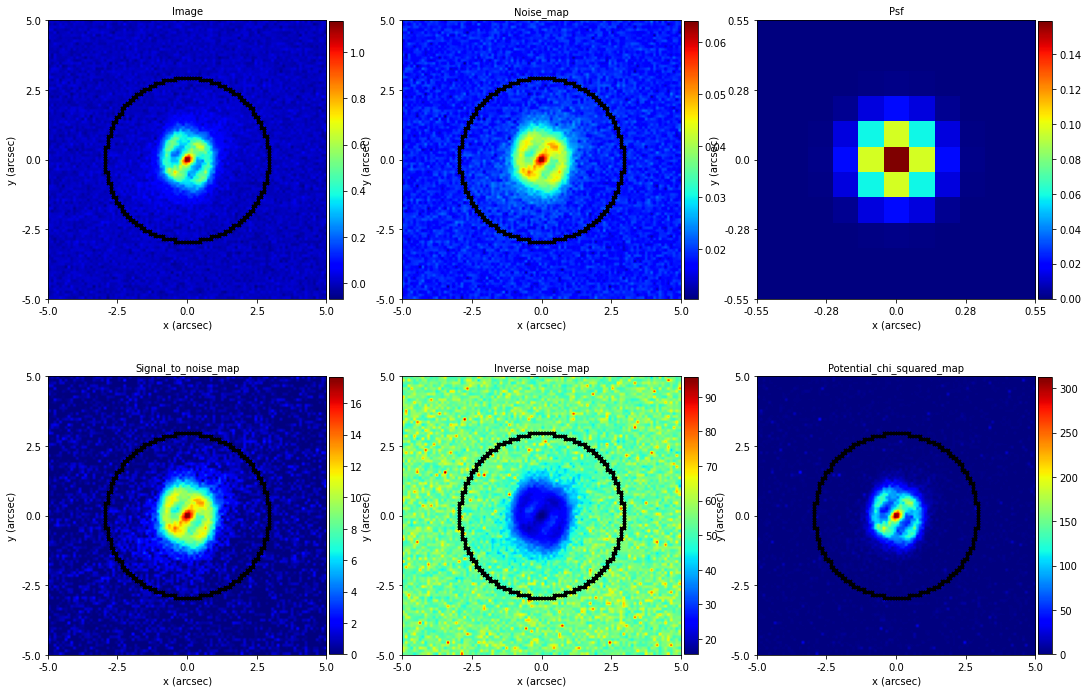

In [5]:
mask = al.Mask.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, radius=3.0
)

aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask)

__Settings__

The *PhaseSettingsImaging* describe how the model is fitted to the data in the log likelihood function. We discussed
these in chapter 2, and a full description of all settings can be found in the example script:

    'autolens_workspace/examples/model/customize/settings.py'.

The settings chosen here are applied to all phases in the pipeline.

In [7]:
settings = al.PhaseSettingsImaging(grid_class=al.Grid, sub_size=2)

__Pipeline_Setup_And_Tagging__:

For this pipeline the pipeline setup customizes:

 - If there is an external shear in the mass model or not.

The pipeline setup 'tags' the output path of a pipeline. For example, if 'no_shear' is True, the pipeline's output 
paths are 'tagged' with the string 'no_shear'.

This means you can run the same pipeline on the same data twice (with and without shear) and the results will go
to different output folders and thus not clash with one another!

In [8]:
setup = al.PipelineSetup(no_shear=False, folders=["howtolens", "c3_t1_lens_and_source"])

__Pipeline Creation__

To create a _Pipeline_, we call a 'make_pipeline' function, which is written in its own Python script: 

    'tutorial_1_pipeline_lens_and_source.py'. 
    
Before we check it out, lets get the pipeline running, by importing the script, running the 'make_pipeline' function
to create the _Pipeline_ object and calling that objects 'run' function.

The 'folders' below specify the path the pipeline results are written to, which is:

    'autolens_workspace/output/howtolens/c3_t1_lens_and_source/pipeline_name/setup_tag/phase_name/settings_tag'

In [10]:
from howtolens.chapter_3_pipelines import tutorial_1_pipeline_lens_and_source

pipeline_lens_and_source = tutorial_1_pipeline_lens_and_source.make_pipeline(
    setup=setup, settings=settings
)

# Uncomment to run.
pipeline_lens_and_source.run(dataset=imaging, mask=mask)

INFO:autofit.tools.pipeline:Running Phase phase_1__lens_sersic (Number 0)
INFO:root:Generating initial samples of model, which are subject to prior limits and other constraints.
INFO:root:No Dynesty samples found, beginning new non-linear search. 
268it [00:26, 10.11it/s, +30 | bound: 56 | nc: 1 | ncall: 2533 | eff(%): 11.765 | loglstar:   -inf < 71.066 <    inf | logz: 58.151 +/-    nan | dlogz:  1.099 >  5.000]    
INFO:root:2500 Iterations: Performing update (Visualization, outputting samples, etc.).
576it [00:26, 21.83it/s, +30 | bound: 146 | nc: 1 | ncall: 5035 | eff(%): 12.036 | loglstar:   -inf < 3438.566 <    inf | logz: 3415.552 +/-    nan | dlogz:  1.099 >  5.000]
INFO:root:5000 Iterations: Performing update (Visualization, outputting samples, etc.).
853it [00:26, 32.48it/s, +30 | bound: 237 | nc: 1 | ncall: 7539 | eff(%): 11.712 | loglstar:   -inf < 4311.386 <    inf | logz: 4279.304 +/-    nan | dlogz:  1.089 >  5.000]
INFO:root:7500 Iterations: Performing update (Visualiza

38it [00:02,  9.90it/s, bound: 2 | nc: 6 | ncall: 310 | eff(%): 12.258 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-  0.336 | dlogz:    inf >  0.109]/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
48it [00:03,  9.45it/s, bound: 3 | nc: 5 | ncall: 360 | eff(%): 13.333 | loglstar:   -inf < -731085.081 <    inf | logz: -731090.857 +/-  0.339 | dlogz: 782429.594 >  0.109]/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
61it [00:05, 10.57it/s, bound: 3 | nc: 5 | ncall: 425 | eff(%): 14.353 | loglstar:   -inf < -538983.792 <    inf | logz: -538989.697 +/-  0.343 | dlogz: 574883.607 >  0.1

389it [00:44,  8.82it/s, +100 | bound: 32 | nc: 1 | ncall: 2616 | eff(%): 18.693 | loglstar:   -inf < 4361.126 <    inf | logz: 4351.947 +/-  0.497 | dlogz:  1.099 >  0.109]
INFO:root:2500 Iterations: Performing update (Visualization, outputting samples, etc.).
391it [00:00, 1973.39it/s, bound: 32 | nc: 6 | ncall: 2627 | eff(%): 14.884 | loglstar:   -inf < -63.410 <    inf | logz: -72.599 +/-  0.428 | dlogz: 4439.306 >  0.109]/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
506it [00:21,  5.26it/s, bound: 45 | nc: 8 | ncall: 3744 | eff(%): 13.51

Okay, good job, we're running our first pipeline in PyAutoLens! But what does it *actually* do? Well, to find that out, 
go to the script 'tutorial_1_pipeline_lens_and_source.py', which contains a full description of the pipeline, as well 
as an overview of the tools we use to write the most general pipelines possible. Once you're done, come back to this 
pipeline runner script and we'll wrap up tutorial 1.

And there we have it, a pipeline that breaks the analysis of the lens and source galaxy into 3 simple phases. This approach is much faster than fitting the lens and source simultaneously from the beginning. 